In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop(columns=['User ID'], inplace=True)

## Binary Encoding

In [5]:
map = {'Male': 1, 'Female': 0}
df['Gender'] = df['Gender'].map(map)

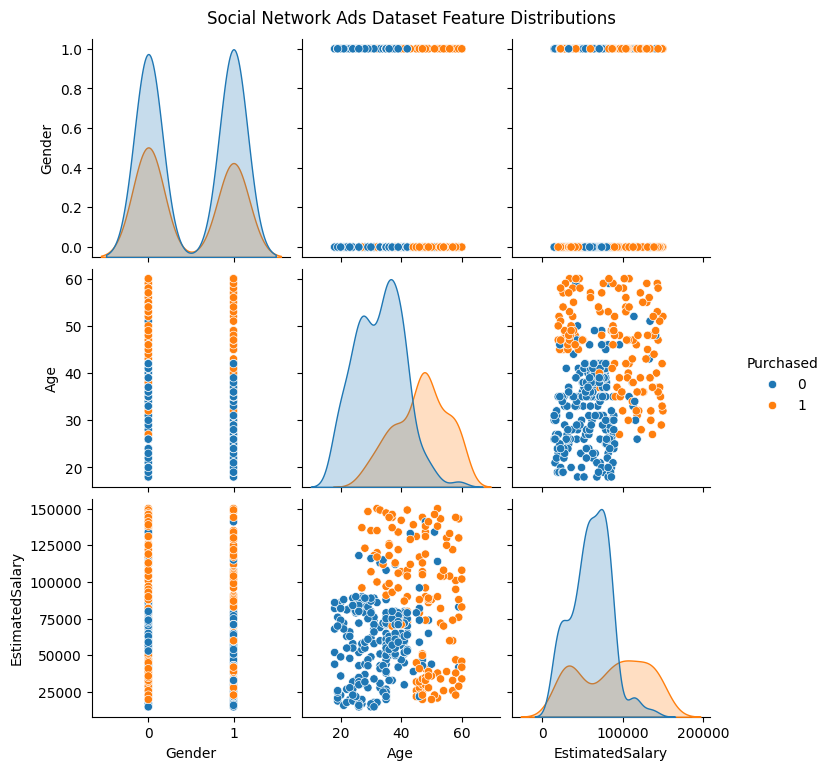

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to show relationships between features
sns.pairplot(df, hue='Purchased')
plt.suptitle("Social Network Ads Dataset Feature Distributions", y=1.02)
plt.show()

In [ ]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

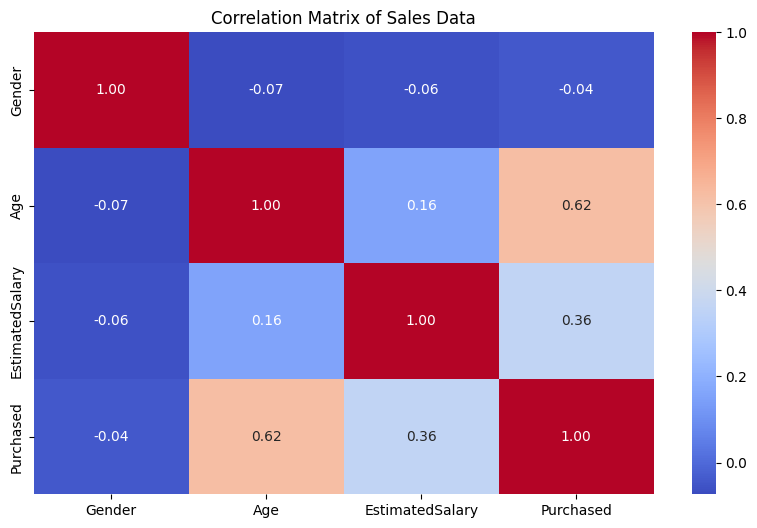

In [ ]:
num = ['Gender', 'Age', 'EstimatedSalary', 'Purchased'
]
corr = df[num].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sales Data')
plt.show()

## Summary of the Correlation Matrix:

This heatmap displays the pairwise Pearson correlation coefficients between four variables: 'Gender', 'Age', 'EstimatedSalary', and 'Purchased'.

Self-Correlation: As expected, each variable has a perfect positive correlation of 1.00 with itself (the diagonal elements).

'Purchased' and 'Age': There's a moderately strong positive correlation of 0.62 between 'Purchased' and 'Age'. This suggests that as age increases, the likelihood of a purchase also tends to increase. This is the strongest correlation with the target variable.

'Purchased' and 'EstimatedSalary': There's a weak positive correlation of 0.36 between 'Purchased' and 'EstimatedSalary'. This indicates a slight tendency for higher estimated salaries to be associated with purchases, but the relationship is not very strong.

'Purchased' and 'Gender': There is a very weak negative correlation of -0.04 between 'Purchased' and 'Gender'.

'Age' and 'EstimatedSalary': There's a weak positive correlation of 0.16 between 'Age' and 'EstimatedSalary'. This means there's a slight tendency for older individuals to have higher estimated salaries, but it's not a strong relationship.

Other Correlations: The correlations between 'Gender' and 'Age' (-0.07), and 'Gender' and 'EstimatedSalary' (-0.06) are very weak, indicating almost no linear relationship.

In [ ]:
X = df.drop(columns = ['Purchased'])
y = df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

## Standardising the Features

In [ ]:
columns_to_standardize = ['Age', 'EstimatedSalary']
scaler = StandardScaler()
X[columns_to_standardize] = scaler.fit_transform(X[columns_to_standardize])

In [ ]:
X.head()

,Gender,Age,EstimatedSalary
0,1,-1.781797,-1.490046
1,1,-0.253587,-1.460681
2,0,-1.113206,-0.785290
3,0,-1.017692,-0.374182
4,1,-1.781797,0.183751


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
len(X_train)

300

#Gaussian naive bayes

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)


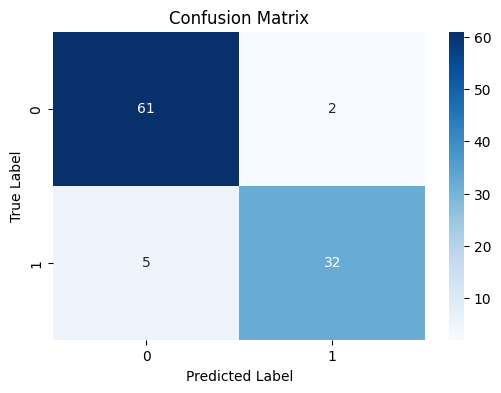

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            )
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.94      0.86      0.90        37

    accuracy                           0.93       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



#K-Nearest Neighbors K=3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        63
           1       0.87      0.89      0.88        37

    accuracy                           0.91       100
   macro avg       0.90      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[58  5]
 [ 4 33]]


#K-Nearest Neighbors K=5


In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        63
           1       0.87      0.92      0.89        37

    accuracy                           0.92       100
   macro avg       0.91      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[58  5]
 [ 3 34]]


#K-Nearest Neighbors K=7


In [ ]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.88      0.95      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[58  5]
 [ 2 35]]


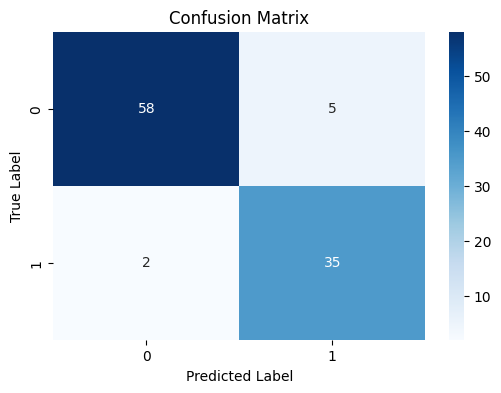

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#Decision Tree (Gini)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[56  7]
 [ 9 28]]


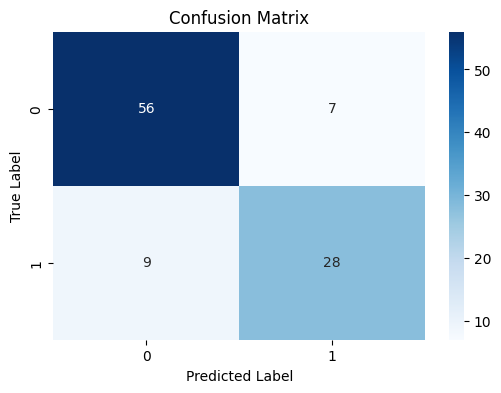

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        63
           1       0.80      0.76      0.78        37

    accuracy                           0.84       100
   macro avg       0.83      0.82      0.83       100
weighted avg       0.84      0.84      0.84       100



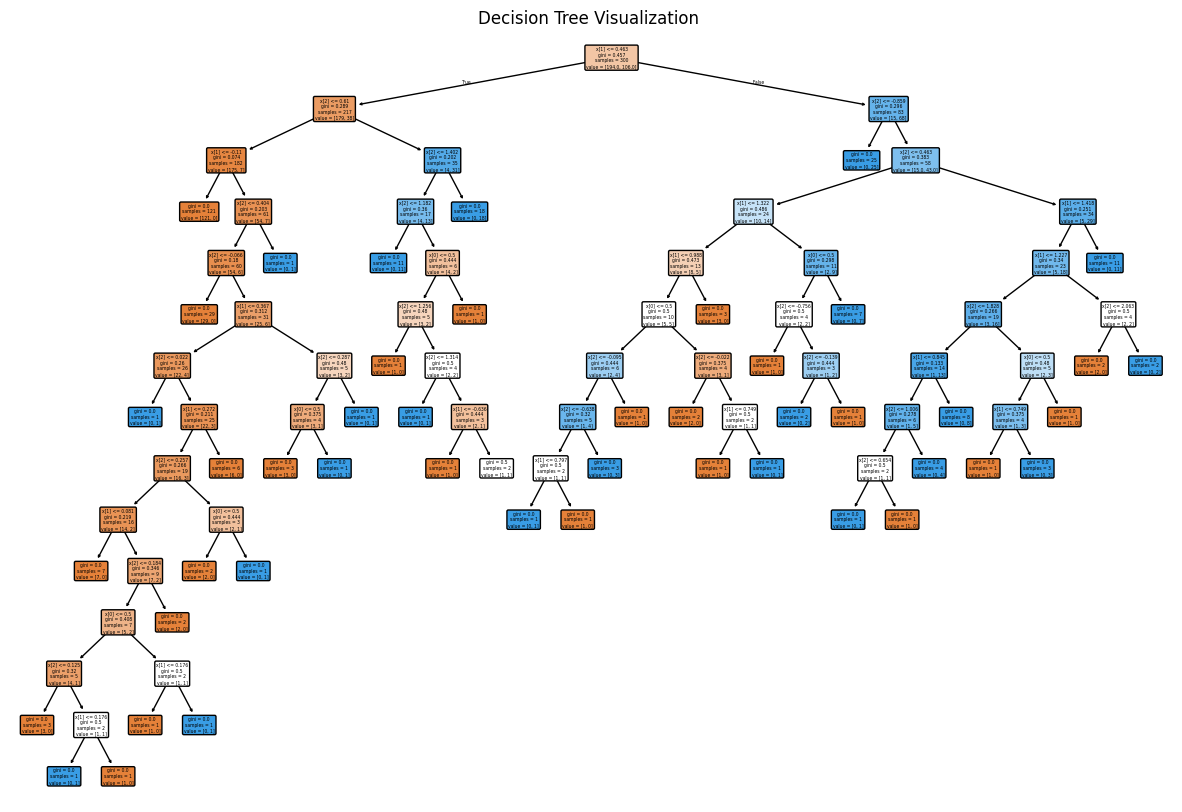

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(model,  filled=True, rounded=True)
plt.title("Decision Tree Visualization ")
plt.show()

#Decision Tree (Entropy)

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[56  7]
 [ 9 28]]


In [ ]:
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        63
           1       0.80      0.76      0.78        37

    accuracy                           0.84       100
   macro avg       0.83      0.82      0.83       100
weighted avg       0.84      0.84      0.84       100



In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

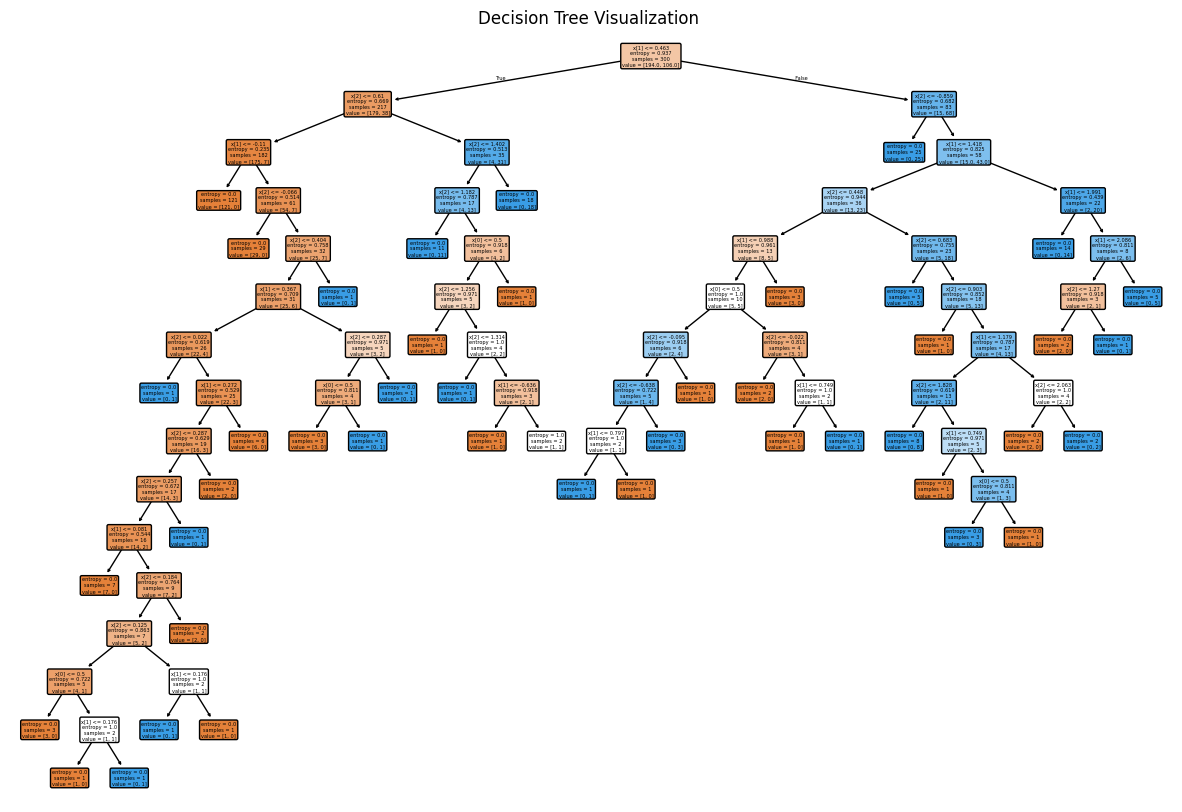

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(model,  filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

## Classification Model Performance Summary
This document provides a summary and comparison of the performance of several classification models I applied to my Social Network Ads dataset, including Gaussian Naive Bayes, K-Nearest Neighbors (with varying K values), and Decision Trees (using Gini and Entropy criteria). My evaluation is based on the provided classification reports, focusing on metrics such as accuracy, precision, recall, and F1-score.

Overall Performance Snapshot
Here's a quick overview of the overall accuracy for each model:

Gaussian Naive Bayes: 93% accuracy

K-Nearest Neighbors (K=3): 91% accuracy

K-Nearest Neighbors (K=5): 92% accuracy

K-Nearest Neighbors (K=7): 93% accuracy

Decision Tree (Gini): 84% accuracy

Decision Tree (Entropy): 84% accuracy

Detailed Analysis and Comparison
Top Performers: Gaussian Naive Bayes and K-Nearest Neighbors (K=7)
Both Gaussian Naive Bayes and K-Nearest Neighbors with K=7 achieved the highest overall accuracy of 93%. Let's look closer at their performance across classes:

Gaussian Naive Bayes:

Class 0 (Not Purchased): Excellent precision (0.92), recall (0.97), and F1-score (0.95). This indicates it's very good at correctly identifying instances of 'Not Purchased' and rarely misclassifies them.

Class 1 (Purchased): Strong precision (0.94), but slightly lower recall (0.86) and F1-score (0.90). While it's precise when it predicts a purchase, it misses about 14% of actual purchases (false negatives).

K-Nearest Neighbors (K=7):

Class 0 (Not Purchased): Very high precision (0.97) and good recall (0.92), leading to an F1-score of 0.94. This means it's highly reliable when predicting 'Not Purchased'.

Class 1 (Purchased): Good precision (0.88) and excellent recall (0.95), resulting in an F1-score of 0.91. This model is particularly strong at identifying actual purchases, minimizing false negatives.

Comparison of Top Performers:
While both models have the same overall accuracy, their strengths differ slightly:

Gaussian Naive Bayes is slightly better at recalling Class 0 (97% vs 92% for kNN K=7) and has a higher F1-score for Class 0.

K-Nearest Neighbors (K=7) is notably better at recalling Class 1 (95% vs 86% for Gaussian Naive Bayes), making it more effective at identifying actual purchases. If correctly identifying purchases (Class 1) is a higher priority, kNN (K=7) might be preferred.

K-Nearest Neighbors (K=3 and K=5)
K=3: Achieved 91% accuracy. It showed slightly lower recall for Class 0 (0.92) and Class 1 (0.89) compared to K=7.

K=5: Achieved 92% accuracy. It improved slightly over K=3, particularly in recall for Class 1 (0.92).

The trend for K-Nearest Neighbors suggests that increasing 'K' from 3 to 7 generally improved performance, likely due to a more robust decision boundary by considering more neighbors, reducing the impact of noise.

Decision Trees (Gini and Entropy)
Both Decision Tree models (Gini and Entropy) performed identically, achieving an accuracy of 84%.

Class 0 (Not Purchased): Moderate precision (0.86), recall (0.89), and F1-score (0.88).

Class 1 (Purchased): Lower precision (0.80) and recall (0.76), leading to a lower F1-score (0.78). This indicates that Decision Trees struggled more with correctly identifying purchases and had a higher rate of false negatives compared to the other models.

The identical performance for Gini and Entropy suggests that for this specific dataset and split, the choice of impurity criterion did not significantly impact the final tree structure or predictive power. Decision Trees, in this instance, were the weakest performers among the models I tested. This could be due to overfitting (if the tree grew too deep) or simply that the linear or distance-based relationships captured by Naive Bayes and kNN were more suitable for my data.

Conclusion and Recommendation
Based on the provided metrics:

Gaussian Naive Bayes and K-Nearest Neighbors (K=7) are the best-performing models, both achieving 93% accuracy.

My choice between these two depends on my specific business objective. If minimizing false negatives for 'Purchased' (i.e., ensuring I catch as many actual purchasers as possible) is critical, K-Nearest Neighbors (K=7) is slightly superior due to its higher recall for Class 1 (0.95). If overall balanced performance across both classes is key, Gaussian Naive Bayes is also an excellent choice.